Create a python script or jupyter notebook named explore_zillow that does the following:

- Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.
- Plot a correlation matrix heatmap.
- Plot latitude agains longitude.
- Create a useable plot with 4 dimensions, e.g. x, y, color, size.
- Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean - and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.
- Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle_zillow

In [2]:
df = wrangle_zillow.wrangle()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50733 entries, 12826780 to 14297519
Data columns (total 19 columns):
bathroomcnt                     50733 non-null float64
bedroomcnt                      50733 non-null float64
calculatedfinishedsquarefeet    50733 non-null float64
fips                            50733 non-null float64
latitude                        50733 non-null float64
longitude                       50733 non-null float64
lotsizesquarefeet               50733 non-null float64
regionidcity                    50733 non-null float64
regionidzip                     50733 non-null float64
roomcnt                         50733 non-null float64
yearbuilt                       50733 non-null float64
structuretaxvaluedollarcnt      50733 non-null float64
taxvaluedollarcnt               50733 non-null float64
landtaxvaluedollarcnt           50733 non-null float64
taxamount                       50733 non-null float64
censustractandblock             50733 non-null float64
l

In [8]:
for col in ['fips', 'regionidcity', 'regionidzip','censustractandblock']:
    df[col] = df[col].astype('object')

In [9]:
num_cols=list(df.select_dtypes('number'))
num_cols.remove('longitude')
num_cols.remove('latitude')
num_cols

['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'lotsizesquarefeet',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror']

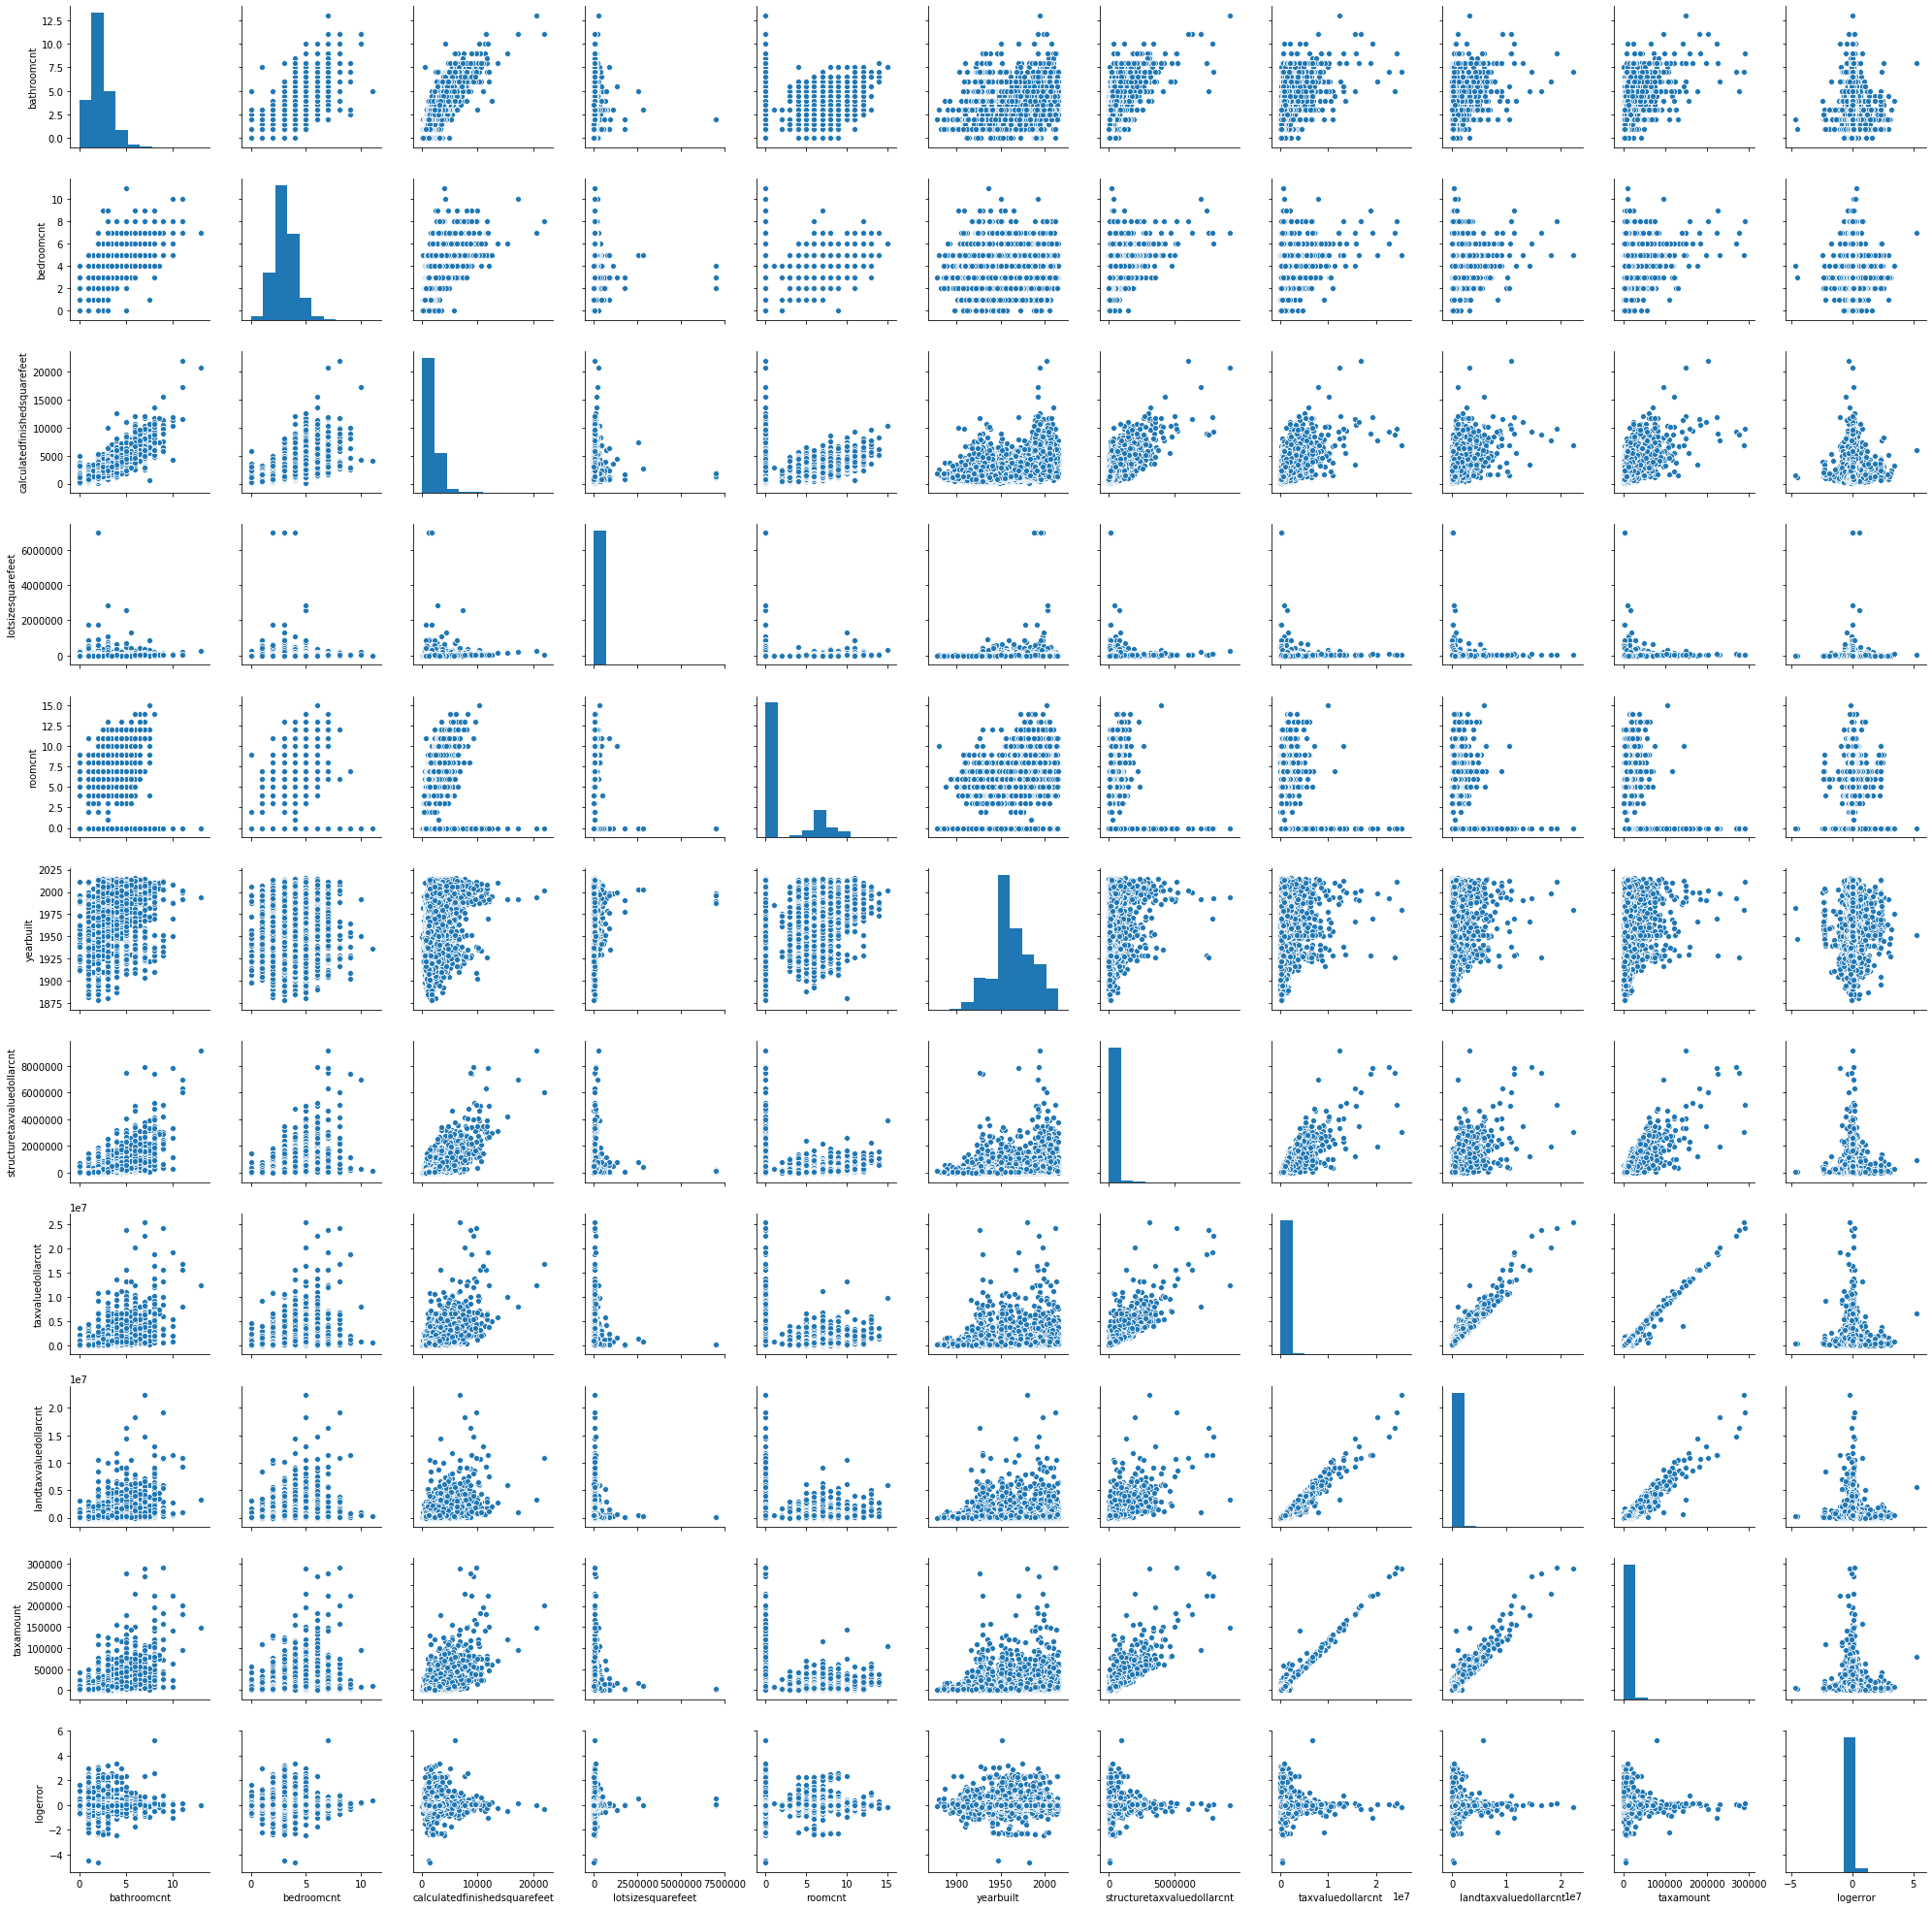

In [10]:
sns.pairplot(df[num_cols])

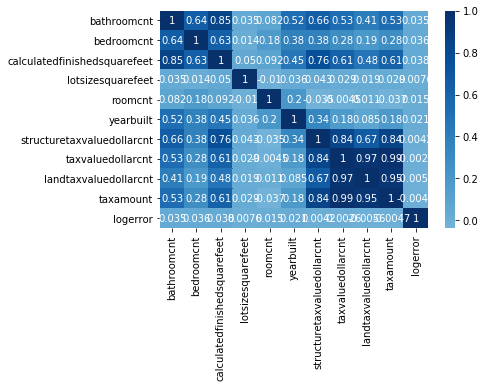

In [15]:
sns.heatmap(df[num_cols].corr(), cmap='Blues', annot=True, center=0)
plt.show()

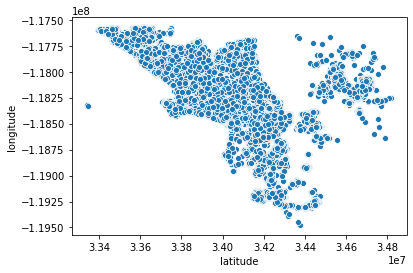

In [17]:
sns.scatterplot(x='latitude',y='longitude',data=df)
plt.show()

In [27]:
# sns.scatterplot(x='latitude',y='longitude',data=df, hue='fips')
# plt.legend()
# plt.show()

In [28]:
overall_mean=df.logerror.mean()
zips_errors=df.groupby('regionidzip')['regionidzip','logerror'].mean().reset_index()

zips_errors['regionidzip']=zips_errors.regionidzip.astype('object')
zips_errors.head()

,regionidzip,logerror
0,95982,0.004178
1,95983,0.005493
2,95984,-0.077403
3,95985,-0.035175
4,95986,-0.006318


In [30]:
import scipy as sp
zip_list=[]
for zips in df.regionidzip.unique():
    if sp.stats.ttest_ind(df[df.regionidzip ==zips].logerror,
    df[df.regionidzip!=zips].logerror)[-1] <0.05:
        zip_list.append(zips)

In [31]:
zip_list

[96480.0,
 96047.0,
 96217.0,
 96043.0,
 96008.0,
 96026.0,
 95989.0,
 96450.0,
 96426.0,
 96001.0,
 96517.0,
 96013.0,
 96030.0,
 96508.0,
 96464.0,
 96022.0,
 96387.0,
 96237.0,
 96005.0,
 96027.0,
 96379.0,
 96050.0,
 96092.0,
 96241.0,
 95997.0,
 96197.0,
 96020.0,
 96280.0,
 96954.0,
 96007.0,
 96120.0,
 95985.0,
 96971.0,
 96985.0,
 96969.0,
 96982.0,
 96989.0,
 96218.0,
 96996.0,
 96940.0,
 96152.0,
 96097.0,
 95984.0,
 96957.0,
 96449.0,
 96939.0,
 97067.0,
 97079.0,
 97324.0,
 96009.0,
 96137.0,
 96019.0,
 96228.0,
 96951.0,
 96004.0,
 96979.0,
 96322.0,
 96226.0,
 96002.0,
 96207.0,
 96973.0]

In [33]:
sp.stats.ttest_ind(df[df.fips =='Los_Angeles_County'].logerror,
    df[df.fips=='Orange_County'].logerror)

Ttest_indResult(statistic=nan, pvalue=nan)